In [117]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
class NaiveBayesClassifier:
    
    def fit(self,X,y):
        
        gaussian_parameters = {}
        
        for outcome in np.unique(y):
            tmp_x = X[y == outcome, :]
            gaussian_parameters[outcome] =  [np.mean(tmp_x, axis = 0), np.var(tmp_x, axis = 0) + 1e-3, len(tmp_x)/len(X)]
        
        
        self.gaussian_parameters = gaussian_parameters
        
    def predict(self,X):
        
        results = np.zeros((len(X), len(self.gaussian_parameters)))
        
        for outcome, gaussian_parameters in self.gaussian_parameters.items():
            mean, var, priors = gaussian_parameters[0], gaussian_parameters[1], gaussian_parameters[2]
            results[:,outcome] = sps.multivariate_normal.logpdf(X, mean = mean, cov = var) + np.log(priors)
        
        return(np.argmax(results,axis = 1))

In [119]:
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [120]:
X,y = make_blobs(center_box=(-4,4))

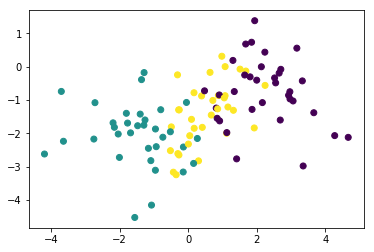

In [121]:
plt.scatter(X[:,0],X[:,1],c = y)

In [122]:
NB = NaiveBayesClassifier()

In [123]:
NB.fit(X,y)

In [124]:
preds = NB.predict(X)

In [125]:
np.mean(preds == y)

0.77

In [126]:
sklearn_nb_test = GaussianNB()
sklearn_nb_test.fit(X,y)
sklearn_preds = sklearn_nb_test.predict(X)

In [127]:
sklearn_preds == preds

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

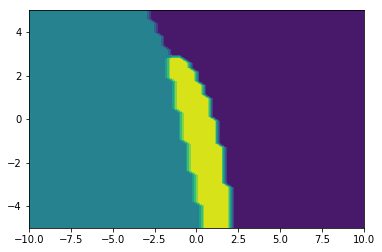

In [128]:
vector_space = np.meshgrid(np.linspace(-10,10), np.linspace(-5,5))
predictions = NB.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])
predictions = np.array(predictions).reshape(vector_space[0].shape)
plt.contourf(vector_space[0],vector_space[1], predictions)

In [129]:
class QDAClassifier:
    
    def fit(self,X,y):
        
        gaussian_parameters = {}
        
        for outcome in np.unique(y):
            tmp_x = X[y == outcome, :]
            gaussian_parameters[outcome] =  [np.mean(tmp_x, axis = 0), np.cov(tmp_x.T) + 1e-3, len(tmp_x)/len(X)]
        
        
        self.gaussian_parameters = gaussian_parameters
        
    def predict(self,X):
        
        results = np.zeros((len(X), len(self.gaussian_parameters)))
        
        for outcome, gaussian_parameters in self.gaussian_parameters.items():
            mean, var, priors = gaussian_parameters[0], gaussian_parameters[1], gaussian_parameters[2]
            results[:,outcome] = sps.multivariate_normal.logpdf(X, mean = mean, cov = var) + np.log(priors)
        
        return(np.argmax(results,axis = 1))

In [130]:
QDA = QDAClassifier()

In [131]:
QDA.fit(X,y)

In [132]:
preds = QDA.predict(X)

In [133]:
np.mean(preds == y)

0.8

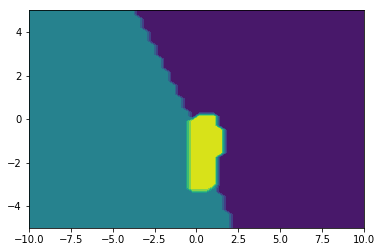

In [134]:
vector_space = np.meshgrid(np.linspace(-10,10), np.linspace(-5,5))
predictions = QDA.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])
predictions = np.array(predictions).reshape(vector_space[0].shape)
plt.contourf(vector_space[0],vector_space[1], predictions)

In [135]:
class LDAClassifier:
    
    def fit(self,X,y):
        
        gaussian_parameters = {}
        
        for outcome in np.unique(y):
            tmp_x = X[y == outcome, :]
            gaussian_parameters[outcome] =  [np.mean(tmp_x, axis = 0), np.cov(tmp_x.T) + 1e-3, len(tmp_x)/len(X)]
        
        pooled_cov = np.zeros_like(gaussian_parameters[0][1])
        for outcome, parameters in gaussian_parameters.items():
            pooled_cov += parameters[1]*parameters[2]
            
        self.gaussian_parameters = gaussian_parameters
        self.pooled_cov = pooled_cov
        
    def predict(self,X):
        
        results = np.zeros((len(X), len(self.gaussian_parameters)))
        
        for outcome, gaussian_parameters in self.gaussian_parameters.items():
            mean, var, priors = gaussian_parameters[0], gaussian_parameters[1], gaussian_parameters[2]
            results[:,outcome] = sps.multivariate_normal.logpdf(X, mean = mean, cov = self.pooled_cov) + np.log(priors)
        
        return(np.argmax(results,axis = 1))

In [136]:
LDA = LDAClassifier()

In [137]:
LDA.fit(X,y)

In [138]:
preds = LDA.predict(X)

In [139]:
np.mean(preds == y)

0.77

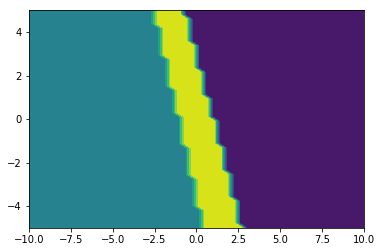

In [140]:
vector_space = np.meshgrid(np.linspace(-10,10), np.linspace(-5,5))
predictions = LDA.predict(np.c_[vector_space[0].ravel(), vector_space[1].ravel()])
predictions = np.array(predictions).reshape(vector_space[0].shape)
plt.contourf(vector_space[0],vector_space[1], predictions)